In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dropout 
import tensorflow as tf
import random as rn


Using TensorFlow backend.


In [2]:
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [3]:
def assign_label(img,flower_type):
    return flower_type

In [4]:
def make_train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            
        X.append(np.array(img))
        Z.append(str(label))

In [7]:
X=[]
Z=[]
IMG_SIZE=80
FLOWER_DAISY_DIR='/Users/user/Desktop/flower/daisy'
FLOWER_SUNFLOWER_DIR='/Users/user/Desktop/flower/sunflower'
FLOWER_TULIP_DIR='/Users/user/Desktop/flower/tulip'
FLOWER_DANDI_DIR='/Users/user/Desktop/flower/dandelion'
FLOWER_ROSE_DIR='/Users/user/Desktop/flower/rose'

In [8]:
print(os.listdir('/Users/user/Desktop/flower'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [9]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

769


In [10]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

1503


In [11]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

2487


In [12]:
#make_train_data('Dandelion',FLOWER_DANDI_DIR)
#print(len(X))

In [13]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

3271


In [14]:
le=LabelEncoder()
Y=le.fit_transform(Z)
s=set(Z)
l=[]
for i in s:
    l.append(i)
cheak1=le.fit_transform(l)
cheak2=to_categorical(cheak1,5)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255


In [15]:
print(cheak2)
print(cheak1)
print(l)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]
[1 3 2 0]
['Rose', 'Tulip', 'Sunflower', 'Daisy']


In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [17]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [18]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [23]:
datagen=ImageDataGenerator()
datagen.fit(x_train)

In [24]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 96)       

In [25]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)


Epoch 1/50
19/19 [==============================] - ETA: 20s - loss: 1.6494 - accuracy: 0.195 - ETA: 17s - loss: 1.5893 - accuracy: 0.253 - ETA: 16s - loss: 1.5302 - accuracy: 0.304 - ETA: 12s - loss: 1.5406 - accuracy: 0.301 - ETA: 11s - loss: 1.5601 - accuracy: 0.287 - ETA: 10s - loss: 1.5387 - accuracy: 0.284 - ETA: 10s - loss: 1.5215 - accuracy: 0.285 - ETA: 9s - loss: 1.5175 - accuracy: 0.272 - ETA: 8s - loss: 1.5130 - accuracy: 0.26 - ETA: 7s - loss: 1.5105 - accuracy: 0.26 - ETA: 7s - loss: 1.5055 - accuracy: 0.26 - ETA: 6s - loss: 1.5010 - accuracy: 0.26 - ETA: 5s - loss: 1.4942 - accuracy: 0.26 - ETA: 4s - loss: 1.4876 - accuracy: 0.26 - ETA: 3s - loss: 1.4788 - accuracy: 0.27 - ETA: 2s - loss: 1.4725 - accuracy: 0.27 - ETA: 2s - loss: 1.4705 - accuracy: 0.27 - ETA: 1s - loss: 1.4635 - accuracy: 0.28 - 22s 1s/step - loss: 1.4565 - accuracy: 0.2834 - val_loss: 1.3232 - val_accuracy: 0.2653
Epoch 2/50
19/19 [==============================] - ETA: 20s - loss: 1.3102 - accuracy: 0

Epoch 10/50
19/19 [==============================] - ETA: 20s - loss: 0.8460 - accuracy: 0.625 - ETA: 19s - loss: 0.8364 - accuracy: 0.656 - ETA: 18s - loss: 0.8136 - accuracy: 0.658 - ETA: 17s - loss: 0.7926 - accuracy: 0.666 - ETA: 15s - loss: 0.7857 - accuracy: 0.671 - ETA: 14s - loss: 0.7867 - accuracy: 0.671 - ETA: 13s - loss: 0.7839 - accuracy: 0.677 - ETA: 12s - loss: 0.7932 - accuracy: 0.676 - ETA: 11s - loss: 0.7935 - accuracy: 0.676 - ETA: 10s - loss: 0.7801 - accuracy: 0.684 - ETA: 9s - loss: 0.7755 - accuracy: 0.685 - ETA: 8s - loss: 0.7722 - accuracy: 0.68 - ETA: 6s - loss: 0.7693 - accuracy: 0.68 - ETA: 5s - loss: 0.7729 - accuracy: 0.68 - ETA: 4s - loss: 0.7720 - accuracy: 0.68 - ETA: 3s - loss: 0.7737 - accuracy: 0.68 - ETA: 2s - loss: 0.7771 - accuracy: 0.67 - ETA: 1s - loss: 0.7778 - accuracy: 0.67 - 24s 1s/step - loss: 0.7786 - accuracy: 0.6772 - val_loss: 0.8057 - val_accuracy: 0.6736
Epoch 11/50
19/19 [==============================] - ETA: 20s - loss: 0.7111 - acc

Epoch 19/50
19/19 [==============================] - ETA: 25s - loss: 0.5424 - accuracy: 0.781 - ETA: 24s - loss: 0.5000 - accuracy: 0.820 - ETA: 22s - loss: 0.5470 - accuracy: 0.789 - ETA: 21s - loss: 0.5239 - accuracy: 0.802 - ETA: 19s - loss: 0.5211 - accuracy: 0.793 - ETA: 15s - loss: 0.4759 - accuracy: 0.797 - ETA: 15s - loss: 0.5072 - accuracy: 0.788 - ETA: 14s - loss: 0.5465 - accuracy: 0.775 - ETA: 12s - loss: 0.5714 - accuracy: 0.767 - ETA: 11s - loss: 0.5771 - accuracy: 0.769 - ETA: 10s - loss: 0.5932 - accuracy: 0.760 - ETA: 8s - loss: 0.5924 - accuracy: 0.766 - ETA: 7s - loss: 0.5888 - accuracy: 0.76 - ETA: 6s - loss: 0.5865 - accuracy: 0.76 - ETA: 4s - loss: 0.5884 - accuracy: 0.76 - ETA: 3s - loss: 0.5853 - accuracy: 0.77 - ETA: 2s - loss: 0.5834 - accuracy: 0.77 - ETA: 1s - loss: 0.5863 - accuracy: 0.76 - 26s 1s/step - loss: 0.5811 - accuracy: 0.7733 - val_loss: 0.6642 - val_accuracy: 0.7396
Epoch 20/50
19/19 [==============================] - ETA: 20s - loss: 0.5110 - a

Epoch 28/50
19/19 [==============================] - ETA: 20s - loss: 0.5578 - accuracy: 0.773 - ETA: 19s - loss: 0.5664 - accuracy: 0.746 - ETA: 17s - loss: 0.5361 - accuracy: 0.760 - ETA: 16s - loss: 0.5373 - accuracy: 0.769 - ETA: 15s - loss: 0.5394 - accuracy: 0.767 - ETA: 14s - loss: 0.5610 - accuracy: 0.764 - ETA: 13s - loss: 0.5457 - accuracy: 0.770 - ETA: 12s - loss: 0.5301 - accuracy: 0.777 - ETA: 11s - loss: 0.5209 - accuracy: 0.781 - ETA: 10s - loss: 0.5289 - accuracy: 0.775 - ETA: 9s - loss: 0.5189 - accuracy: 0.783 - ETA: 7s - loss: 0.5192 - accuracy: 0.78 - ETA: 6s - loss: 0.5092 - accuracy: 0.78 - ETA: 5s - loss: 0.5115 - accuracy: 0.78 - ETA: 4s - loss: 0.5061 - accuracy: 0.78 - ETA: 3s - loss: 0.5016 - accuracy: 0.79 - ETA: 2s - loss: 0.5001 - accuracy: 0.79 - ETA: 1s - loss: 0.5033 - accuracy: 0.79 - 23s 1s/step - loss: 0.4937 - accuracy: 0.7991 - val_loss: 0.6835 - val_accuracy: 0.7396
Epoch 29/50
19/19 [==============================] - ETA: 20s - loss: 0.4360 - acc

Epoch 37/50
19/19 [==============================] - ETA: 21s - loss: 0.4645 - accuracy: 0.796 - ETA: 20s - loss: 0.3919 - accuracy: 0.835 - ETA: 19s - loss: 0.3697 - accuracy: 0.851 - ETA: 17s - loss: 0.3682 - accuracy: 0.855 - ETA: 16s - loss: 0.3693 - accuracy: 0.848 - ETA: 15s - loss: 0.3668 - accuracy: 0.854 - ETA: 14s - loss: 0.3732 - accuracy: 0.857 - ETA: 11s - loss: 0.3952 - accuracy: 0.857 - ETA: 10s - loss: 0.3813 - accuracy: 0.861 - ETA: 9s - loss: 0.3886 - accuracy: 0.858 - ETA: 8s - loss: 0.3850 - accuracy: 0.85 - ETA: 7s - loss: 0.3835 - accuracy: 0.85 - ETA: 6s - loss: 0.3763 - accuracy: 0.86 - ETA: 5s - loss: 0.3762 - accuracy: 0.86 - ETA: 4s - loss: 0.3805 - accuracy: 0.85 - ETA: 3s - loss: 0.3758 - accuracy: 0.86 - ETA: 2s - loss: 0.3727 - accuracy: 0.86 - ETA: 1s - loss: 0.3755 - accuracy: 0.86 - 24s 1s/step - loss: 0.3756 - accuracy: 0.8641 - val_loss: 0.6855 - val_accuracy: 0.7482
Epoch 38/50
19/19 [==============================] - ETA: 20s - loss: 0.2378 - accur

Epoch 46/50
19/19 [==============================] - ETA: 20s - loss: 0.2717 - accuracy: 0.875 - ETA: 19s - loss: 0.3255 - accuracy: 0.878 - ETA: 18s - loss: 0.3618 - accuracy: 0.864 - ETA: 17s - loss: 0.3716 - accuracy: 0.863 - ETA: 15s - loss: 0.3951 - accuracy: 0.853 - ETA: 14s - loss: 0.3936 - accuracy: 0.850 - ETA: 13s - loss: 0.3805 - accuracy: 0.854 - ETA: 12s - loss: 0.3989 - accuracy: 0.844 - ETA: 11s - loss: 0.3995 - accuracy: 0.841 - ETA: 10s - loss: 0.4109 - accuracy: 0.839 - ETA: 9s - loss: 0.4063 - accuracy: 0.841 - ETA: 7s - loss: 0.4036 - accuracy: 0.84 - ETA: 6s - loss: 0.4079 - accuracy: 0.84 - ETA: 5s - loss: 0.4029 - accuracy: 0.84 - ETA: 4s - loss: 0.4119 - accuracy: 0.84 - ETA: 3s - loss: 0.4103 - accuracy: 0.84 - ETA: 2s - loss: 0.4065 - accuracy: 0.84 - ETA: 1s - loss: 0.3986 - accuracy: 0.84 - 23s 1s/step - loss: 0.3980 - accuracy: 0.8499 - val_loss: 0.6123 - val_accuracy: 0.7494
Epoch 47/50
19/19 [==============================] - ETA: 20s - loss: 0.4959 - acc

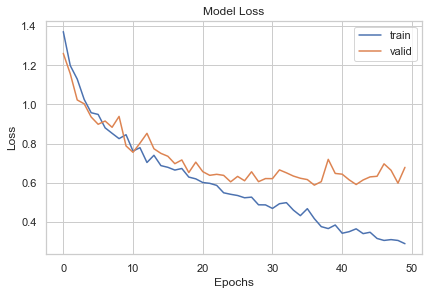

In [363]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()

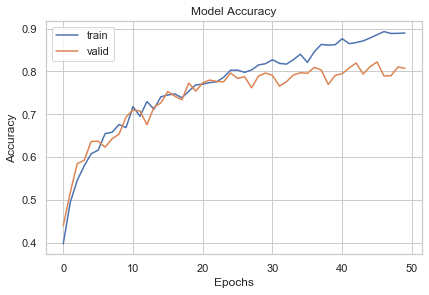

In [364]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()

In [365]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [366]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [367]:
def make_train_data1(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            
        t.append(np.array(img))
        s.append(str(label))

In [433]:
t=[]
s=[]
DIR1='/Users/user/Desktop/test/dandilion'
DIR2='/Users/user/Desktop/test/daisy'
DIR5='/Users/user/Desktop/test/tulip'
DIR4='/Users/user/Desktop/test/sunflower'
DIR3='/Users/user/Desktop/test/rose'
make_train_data1('dandilion',DIR1)
make_train_data1('daisy',DIR2)
make_train_data1('rose',DIR3)
make_train_data1('sunflower',DIR4)
make_train_data1('tulip',DIR5)

In [434]:
le=LabelEncoder()
u=le.fit_transform(s)
u=to_categorical(u,5)
t=np.array(t)
t=t/255
print(t.shape)

(5, 80, 80, 3)


In [435]:
# getting predictions on val set.
pred=model.predict(t)
pred_digits=np.argmax(pred,axis=1)
print(pred_digits)
print(pred)

[1 0 2 3 2]
[[7.1635363e-06 9.9999261e-01 8.1267366e-08 1.3924598e-08 6.5437689e-08]
 [1.0000000e+00 1.1669774e-19 2.3103899e-25 1.9335520e-23 8.0176751e-25]
 [7.8955219e-07 2.8950686e-10 9.9998939e-01 1.4367291e-10 9.7913244e-06]
 [5.7488103e-10 2.3977848e-06 3.8500748e-11 9.9999750e-01 6.3429056e-08]
 [5.4857589e-02 1.0547447e-04 9.0437633e-01 2.7079254e-03 3.7952576e-02]]


In [444]:
prop_class=[]
mis_class=[]

for i in range(5):
    if(cheak1[i]==pred_digits[i]):
        prop_class.append(i)

i=0
for i in range(5):
    if( cheak1[i]!=pred_digits[i]):
        mis_class.append(i)

In [445]:
print(len(prop_class))
print(len(mis_class))

4
1


(5,)


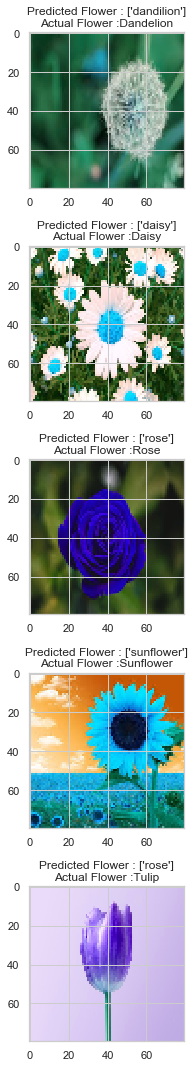

In [452]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(5,1)
print(ax.shape)
fig.set_size_inches(15,15)
for j in range (5):
        ax[j].imshow(t[count])
        ax[j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[count]]))+"\n"+"Actual Flower :"+l[count] )
        plt.tight_layout()
        count+=1